# Plano de fase

Este notebook demonstra a criação de um plano de fase para um sistema em vibração livre amortecida.



### Setup

In [5]:
# Inicialização de pacotes
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
import ipympl
%matplotlib widget

## Equações

Vamos definir o sistema padrão no qual o período natual não amortecido é mais ou menos 1s, com $k = 40\, \mathrm{N}/\mathrm{m}$ e $m=1\,\mathrm{kg}$.

A resposta do sistema subamortecido é dada por 
$$ x(t) = Xe^{-\zeta \omega_n t} \cos (\omega_d t - \phi)$$
e derivando em relação ao tempo,
$$ \dot x(t) = - Xe^{-\zeta\omega_n t} \left[\zeta \omega_n  \cos(\omega_d - \phi) +\omega_d  \sin(\omega_d t - \phi) . \right]$$

Para saber quanto tempo vamos simular, vamos usar o decremento logaritimico para estimar em quantos períodos a amplitude cai de uma determinada razão dada, $f$. Assim,

$$ \delta = \frac{1}{m} \ln \frac{x_1}{x_{m+1}} = \frac{1}{m} \ln \frac{1}{f} = - \frac{1}{m}\ln f = \zeta \omega_n \tau_d,$$
então$$ m = - \frac{\ln f}{\zeta \omega_n \tau_d} .$$

No programa vamos arredondar isto para um número inteiro de períodos.

## Cálculo da resposta

In [6]:
def response(x0, v0, zeta, wn, wd, times):
  """
  Calcula a resposta de um oscilador harmônico amortecido.
  """
  C1 = x0
  C2 = (v0+zeta*wn*x0)/wd

  X = np.hypot(C1, C2)
  phi = np.arctan2(C2, C1)

  env = X*np.exp(-zeta*wn*times)
  x = env*np.cos(wd*times - phi)
  v = -env*(zeta*wn*np.cos(wd*times - phi)  
            + wd*np.sin(wd*times - phi))
  return x, v

## Função de plotagem

In [7]:
def do_plot(times, wn, x, v, E):
  """
  Generate plots.
  Displacement/Velocity and Phase Plane
  """
  fig, ax = plt.subplots(3, 1)  # Displacement/Velocity
  ax_v = ax[0].twinx()
  fig.set_size_inches(14, 24)
  ax[0].set_xlim([0, times[-1]])
  ax[0].set_title("Resposta em vibração livre amortecida", fontsize=26)
  ax[0].set_xlabel("tempo", fontsize=20)
  ax[0].set_ylabel("Deslocamento", fontsize=20)
  ax[0].plot(times, x, color="blue")

  ax_v.set_ylabel("Velocidade", fontsize=20)
  ax_v.plot(times, v, color="red")

  vn = v/wn                      # Phase plane
  R = np.hypot(x[0],  vn[0])
  an = np.linspace(0, 2*np.pi, 360)
  ax[1].plot(R*np.cos(an), R*np.sin(an), ls='dashed', lw='0.5')
  ax[1].plot(x, vn)
  ax[1].axis('equal')
  ax[1].set_title("Plano de fase", fontsize=26)
  ax[1].set_xlabel(r"$x(t)$", fontsize=20)
  ax[1].set_ylabel(r"$\dot{x}(t)/\omega_m$", fontsize=20)

  ax[2].plot(times, E)
  ax[2].set_xlim([0, times[-1]])
  ax[2].set_ylim(bottom=0)
  ax[2].set_title("Energia Total", fontsize=26)
  ax[2].set_xlabel(r"$t$", fontsize=20)
  ax[2].set_ylabel(r"$T+U$", fontsize=20)
  # fig.show()

## Interface

interactive(children=(FloatSlider(value=1.2, description='Coef. amortecimento:', max=8.854377448471462), Float…

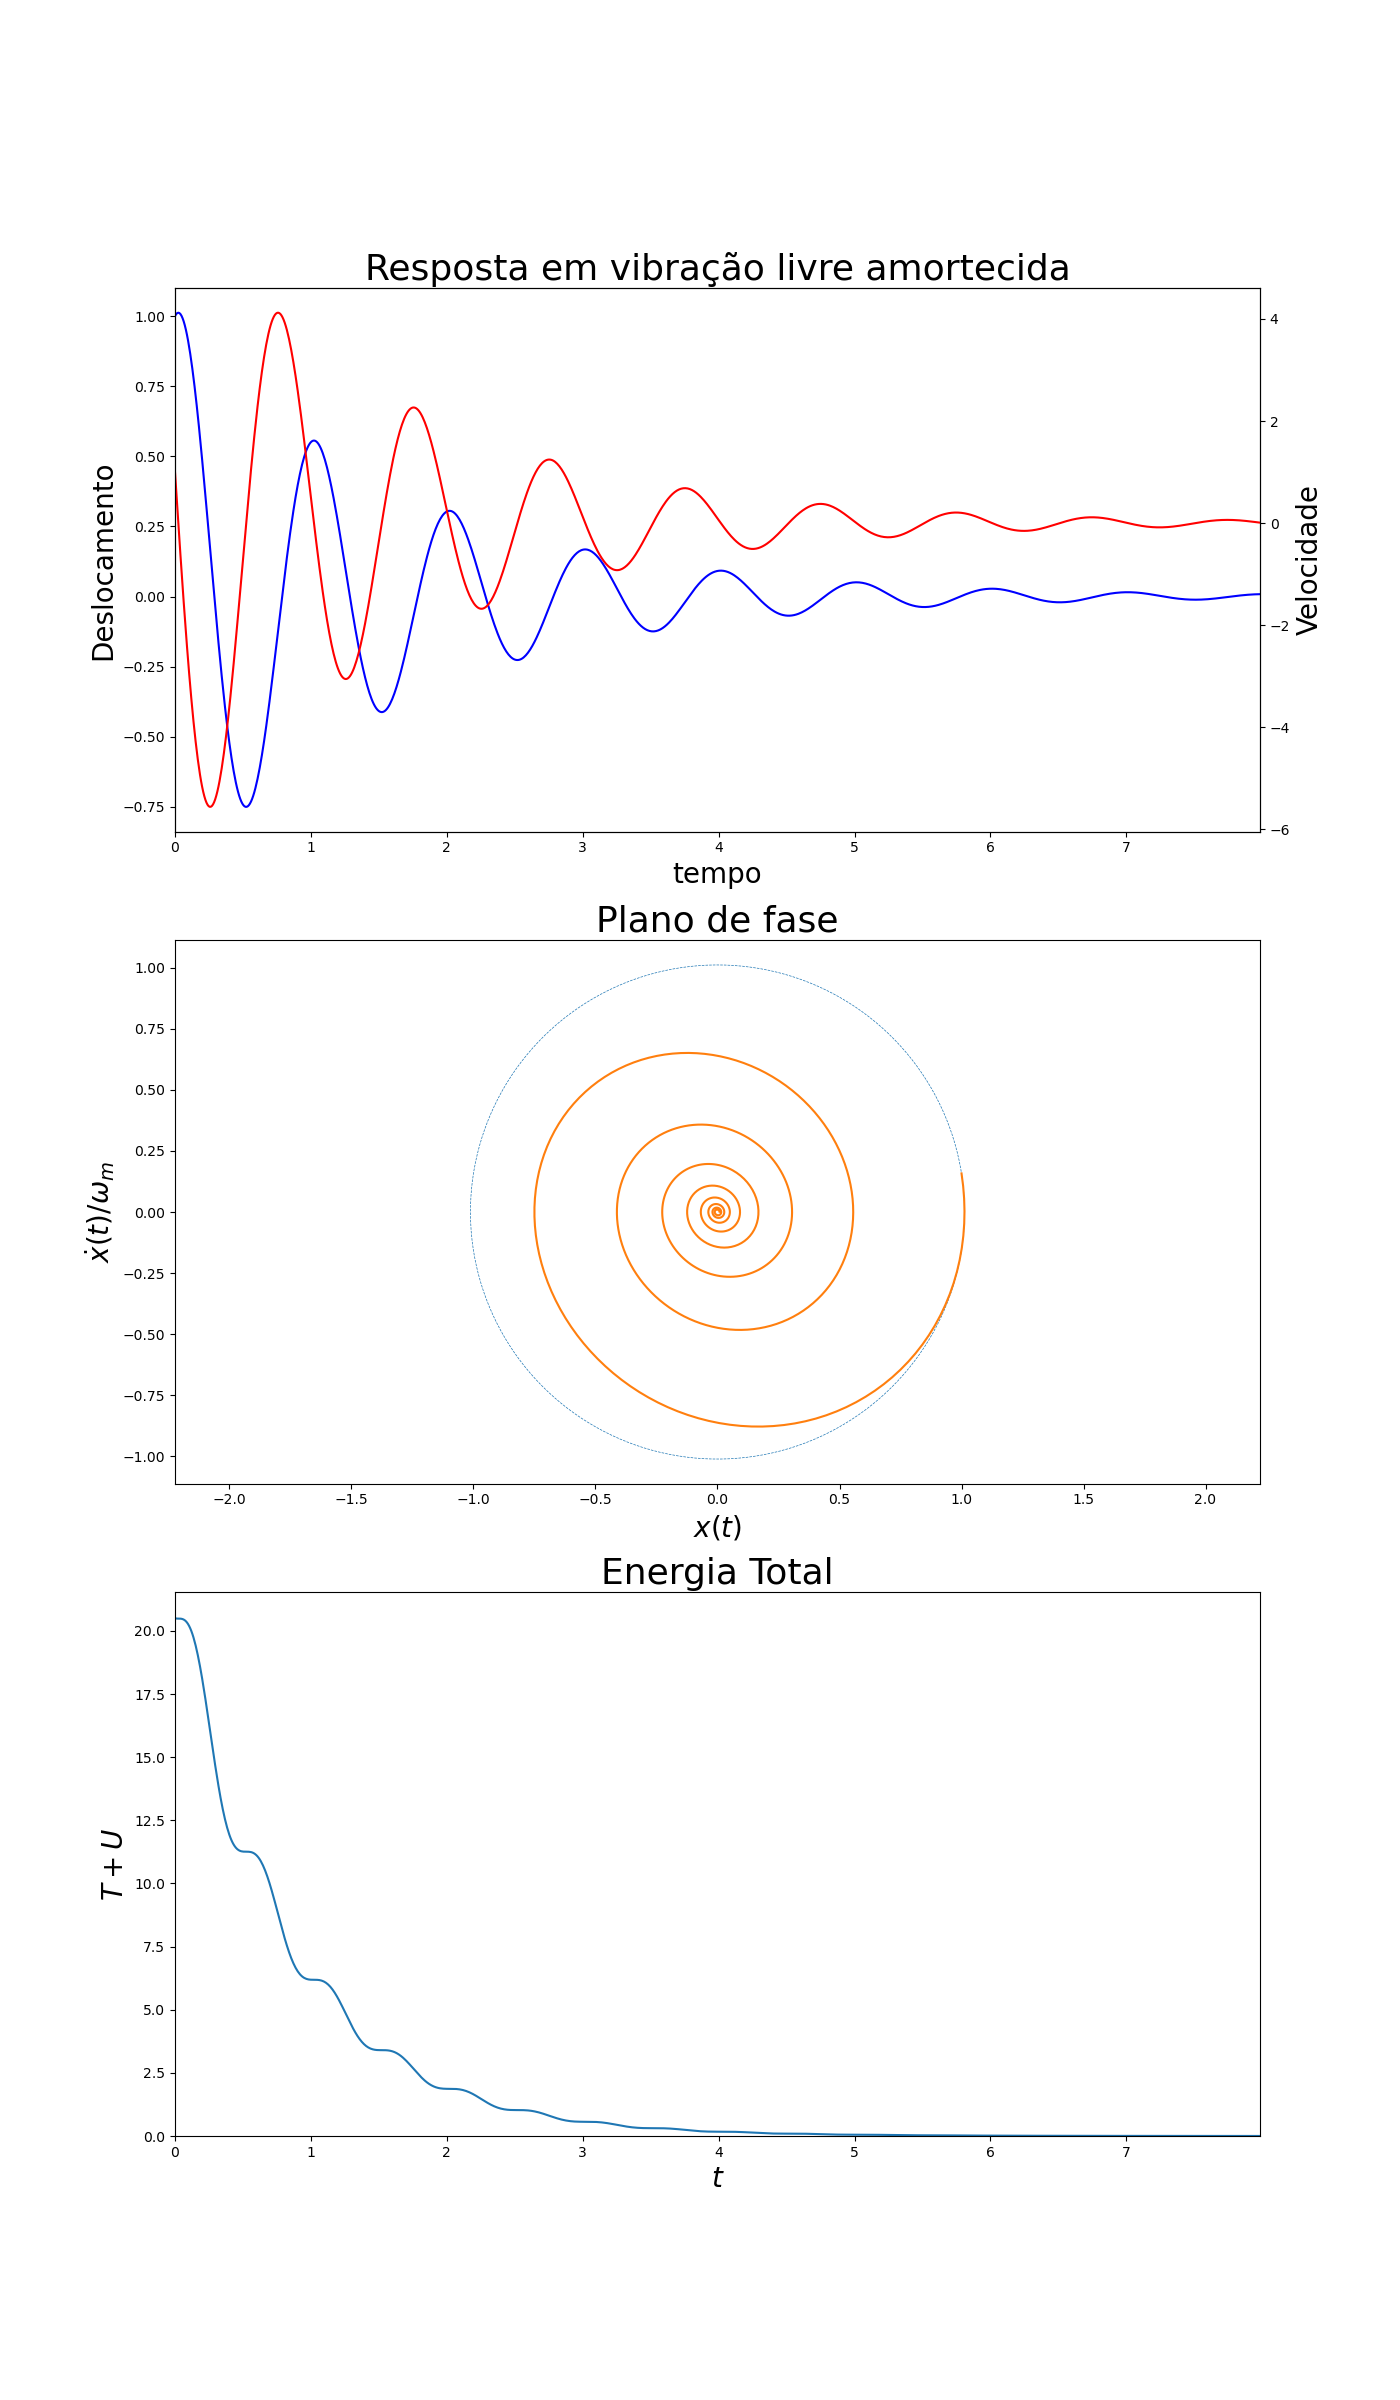

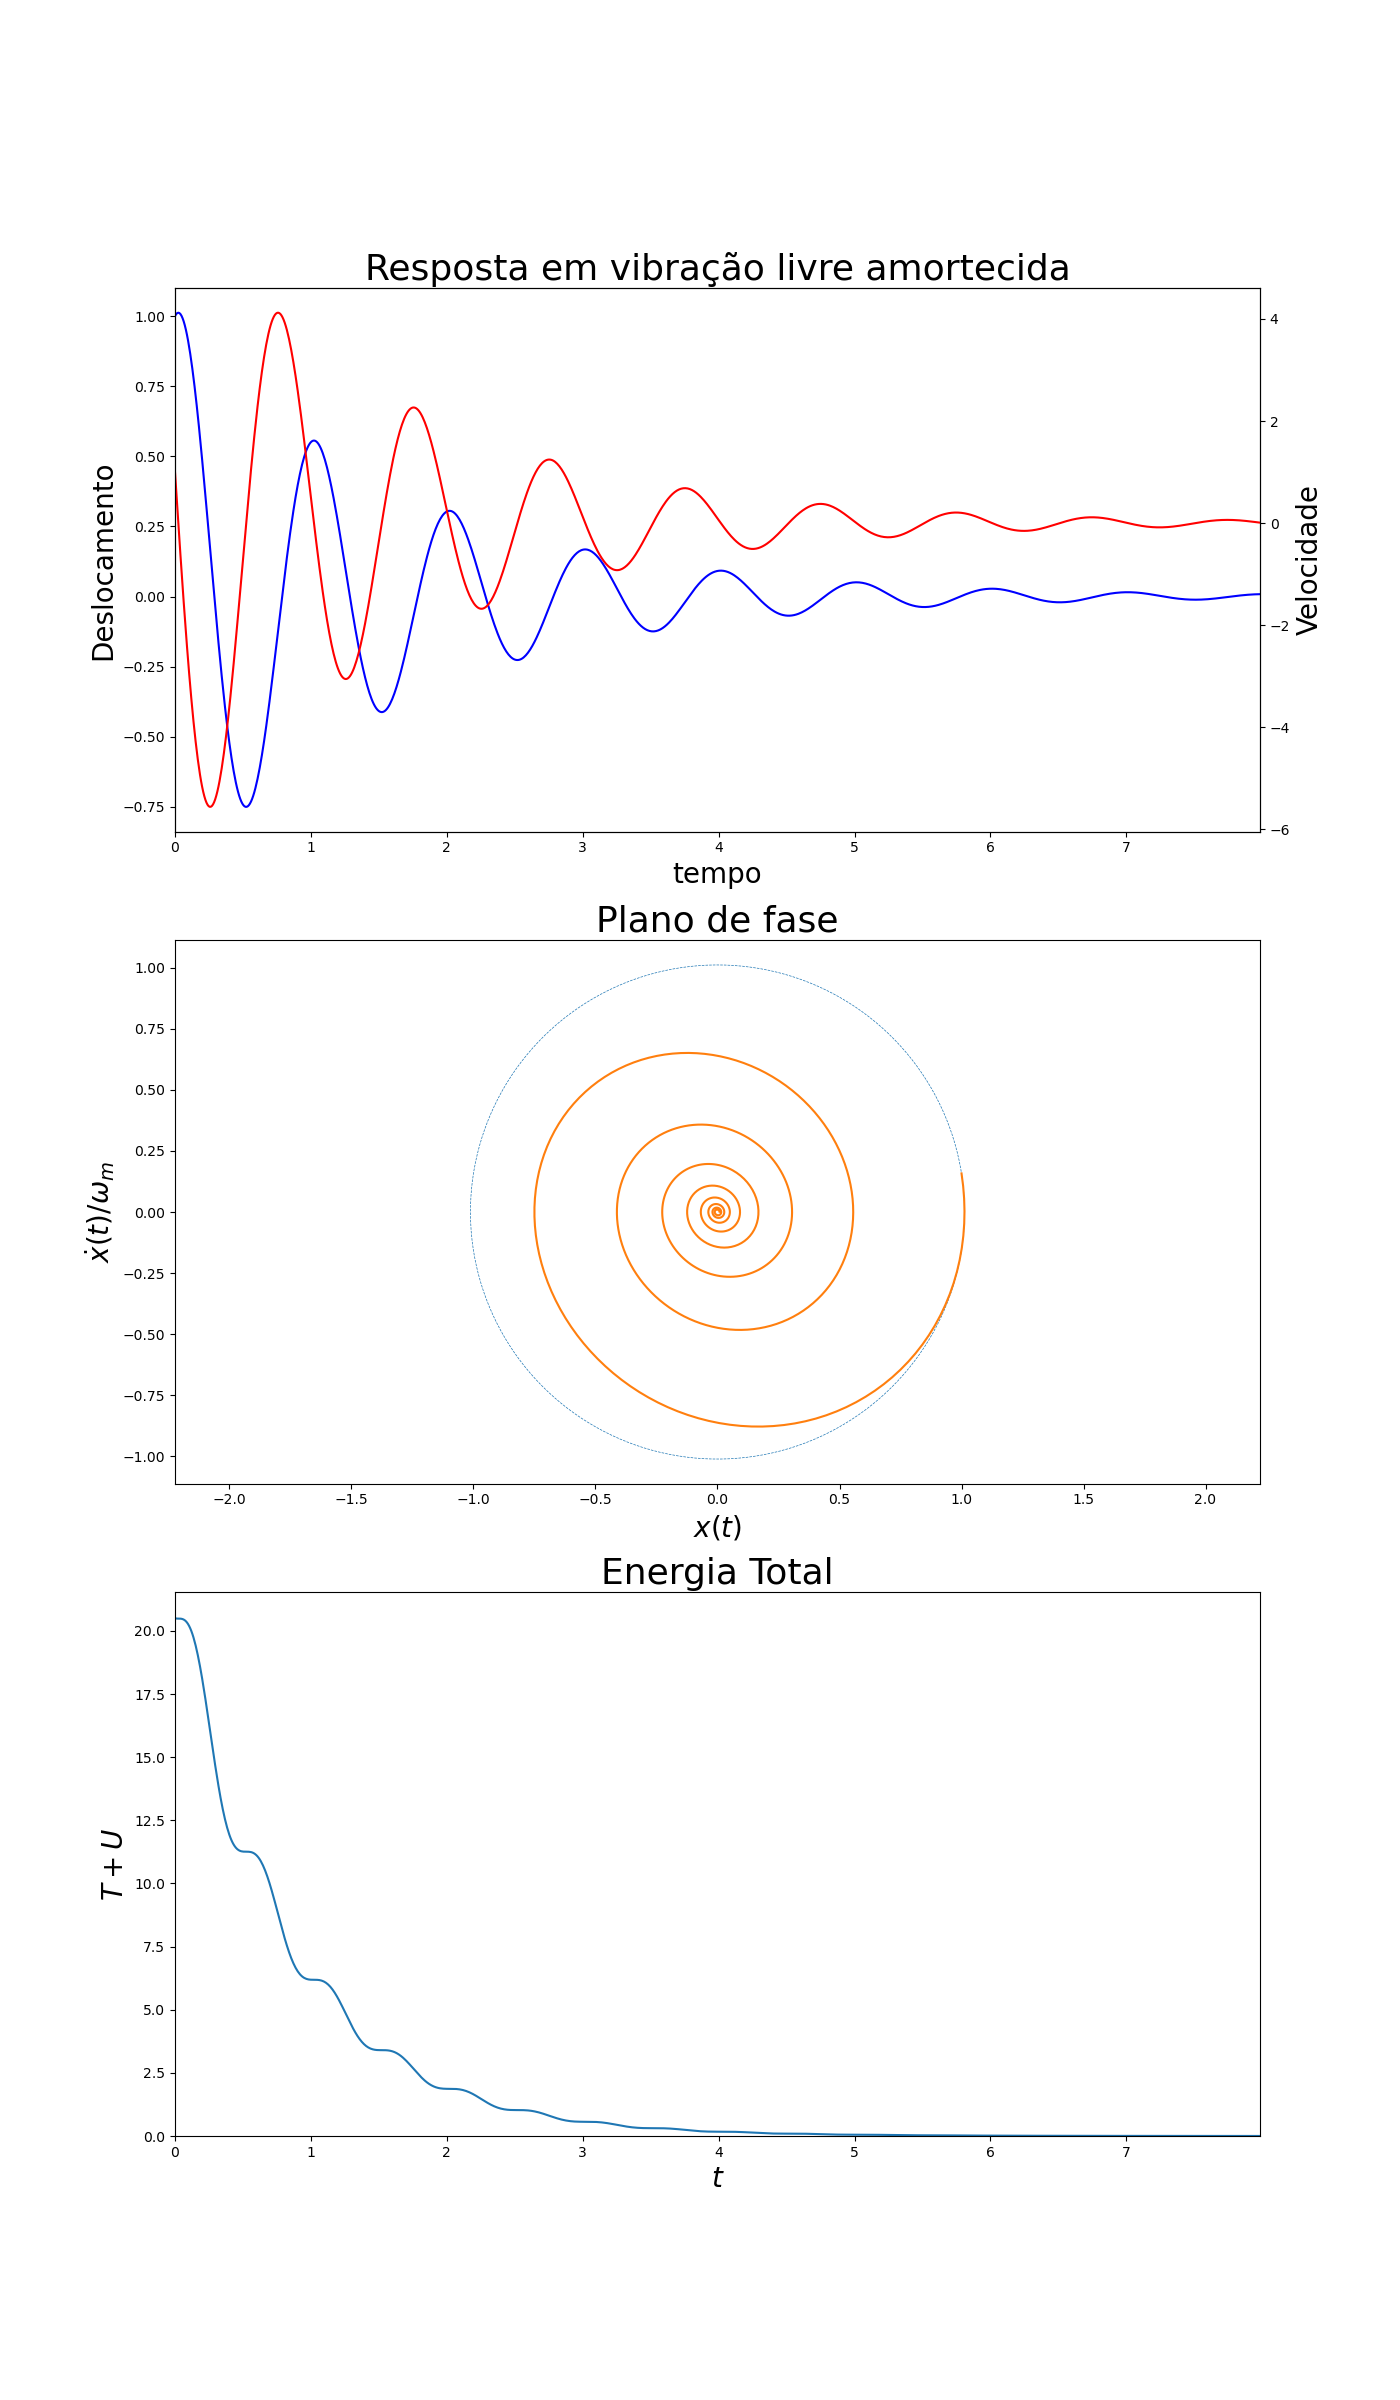

In [8]:
#@title Só para poder esconder o código.
m = 1.0
k = 40.0
f = 0.01
nt = 1000          # número total de pontos de plotagem

wn = np.sqrt(k/m)
cc = 2*m*wn

ci = FloatSlider(value=1.2, min=0.0, max=0.7*cc, step=0.1,
                 description="Coef. amortecimento:",
                 contiguous_update=False)
xi = FloatSlider(value=1, min=0.0, max=2.0, step=0.1,
                 description="Desl. Inicial:",
                 contiguous_update=False)
vi = FloatSlider(value=1, min=0.0, max=10.0, step=0.1,
                 description="Vel. Inicial normalizada:",
                 contiguous_update=False)

@interact 
def phase_plane(c=ci, x0=xi, v0=vi):
  zeta = c/cc
  wd = np.sqrt(1-zeta**2)*wn
  taud = 2*np.pi/wd
  nm = int(np.ceil(-(np.log(f))/(zeta*wn*taud)))
  times =  np.linspace(0, nm*taud, nt, endpoint=True)
  x, v = response(x0, v0, zeta, wn, wd, times)
  E = 0.5*(m*v**2+k*x**2)
  do_plot(times, wn, x, v, E)
 
  pzeta = 100*zeta
  print(f"Razão de amortecimento: {pzeta:.2f}%")
  print(f"Frequência amortecida: {wd:.2f}")
  print(f"Número de períodos até parada: {nm}")
  

